In [8]:
import xarray as xr
import pandas as pd
import numpy as np

In [2]:
filename_nc = '../../data/output/Peru_C0_20160901-20170831.nc'
ds = xr.open_dataset(filename_nc)
ds

<xarray.Dataset>
Dimensions:       (lat: 18, lon: 18, time: 8760)
Coordinates:
  * time          (time) datetime64[ns] 2016-09-01 ... 2017-08-31T23:00:00
  * lat           (lat) float64 -8.966 -8.966 -8.965 ... -8.966 -8.967 -8.967
  * lon           (lon) float64 -77.64 -77.64 -77.64 ... -77.63 -77.63 -77.63
Data variables:
    HGT           (lat, lon) float64 ...
    MASK          (lat, lon) float64 ...
    SLOPE         (lat, lon) float64 ...
    ASPECT        (lat, lon) float64 ...
    T2            (time, lat, lon) float64 ...
    RH2           (time, lat, lon) float64 ...
    U2            (time, lat, lon) float64 ...
    PRES          (time, lat, lon) float64 ...
    G             (time, lat, lon) float64 ...
    RRR           (time, lat, lon) float64 ...
    N             (time, lat, lon) float64 ...
    RAIN          (time, lat, lon) float64 ...
    SNOWFALL      (time, lat, lon) float64 ...
    LWin          (time, lat, lon) float64 ...
    LWout         (time, lat, lon) float64 ...
    H             (time, lat, lon) float64 ...
    LE            (time, lat, lon) float64 ...
    B             (time, lat, lon) float64 ...
    QRR           (time, lat, lon) float64 ...
    surfMB        (time, lat, lon) float64 ...
    MB            (time, lat, lon) float64 ...
    Q             (time, lat, lon) float64 ...
    SNOWHEIGHT    (time, lat, lon) float64 ...
    TOTALHEIGHT   (time, lat, lon) float64 ...
    TS            (time, lat, lon) float64 ...
    ALBEDO        (time, lat, lon) float64 ...
    LAYERS        (time, lat, lon) float64 ...
    ME            (time, lat, lon) float64 ...
    intMB         (time, lat, lon) float64 ...
    EVAPORATION   (time, lat, lon) float64 ...
    SUBLIMATION   (time, lat, lon) float64 ...
    CONDENSATION  (time, lat, lon) float64 ...
    DEPOSITION    (time, lat, lon) float64 ...
    REFREEZE      (time, lat, lon) float64 ...
    subM          (time, lat, lon) float64 ...
    Z0            (time, lat, lon) float64 ...
    surfM         (time, lat, lon) float64 ...
Attributes:
    Start_from_restart_file:                    False
    Stake_evaluation:                           False
    WRF_simulation:                             False
    Compression_level:                          2
    Slurm_use:                                  False
    Full_fiels:                                 False
    Force_use_TP:                               False
    Force_use_N:                                False
    Tile_of_glacier_of_interest:                False
    Time_step_input_file_seconds:               3600
    Max_layers:                                 200
    Z_measurment_height:                        2.0
    Stability_correction:                       Ri
    Albedo_method:                              Oerlemans98
    Densification_method:                       Boone
    Penetrating_method:                         Bintanja95
    Roughness_method:                           Moelg12
    Saturation_water_vapour_method:             Sonntag90
    Initial_snowheight:                         0.0
    Initial_snow_layer_heights:                 0.0
    Initial_glacier_height:                     30.0
    Initial_glacier_layer_heights:              0.5
    Initial_top_density_snowpack:               200.0
    Initial_bottom_density_snowpack:            500.0
    Temperature_bottom:                         271.0
    Const_init_temp:                            0.1
    Center_snow_transfer_function:              2.1
    Spread_snow_transfer_function:              0.5
    Multiplication_factor_for_RRR_or_SNOWFALL:  1.0
    Minimum_snow_layer_height:                  0.0053
    Minimum_snowfall:                           0.0033
    Remesh_method:                              log_profile
    First_layer_height_log_profile:             0.01
    Layer_stretching_log_profile:               1.2
    Merge_max:                                  1
    Density_threshold_merging:                  5
    Temperature_

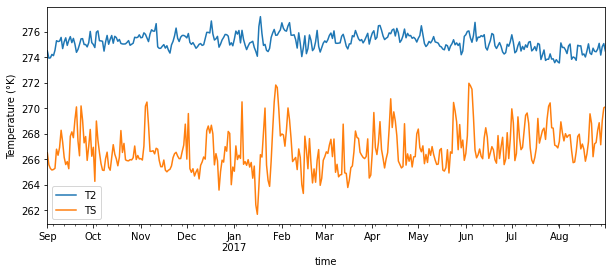

In [3]:
T2 = ds['T2'].where(ds['MASK']==1).resample(time='1D').mean('time')
df = T2.mean('lon').mean('lat').to_dataframe()
TS = ds['TS'].where(ds['MASK']==1).resample(time='1D').mean('time')
df['TS'] = TS.mean('lon').mean('lat').values

#df = df-273.16
fig = df.plot(figsize = (10,4)).set_ylabel('Temperature (°K)').get_figure()
fig.savefig('out/temp.png',dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

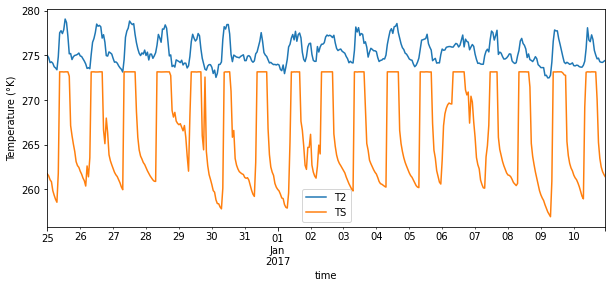

In [4]:
T2 = ds['T2'].where(ds['MASK']==1)
df = T2.mean('lon').mean('lat').to_dataframe()
TS = ds['TS'].where(ds['MASK']==1)
df['TS'] = TS.mean('lon').mean('lat').values
df = df.loc['2016-12-25':'2017-01-10']
fig = df.plot(figsize = (10,4)).set_ylabel('Temperature (°K)').get_figure()
fig.savefig('out/temp_hour.png',dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

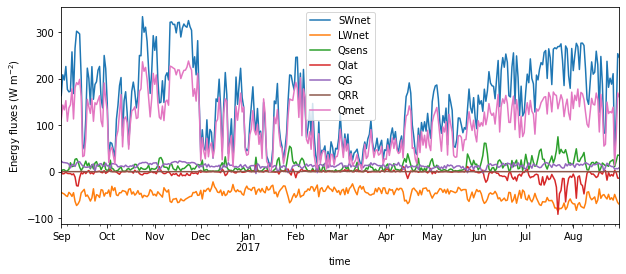

In [5]:
G = ds['G'].where(ds['MASK']==1).resample(time='1D').mean('time').mean('lon').mean('lat')
df1 = G.to_dataframe()
alpha  = ds['ALBEDO'].where(ds['MASK']==1).resample(time='1D').mean('time').mean('lon').mean('lat')
df1['SWnet'] = G * (1 - alpha)
del df1['G']
LWin  = ds['LWin'].where(ds['MASK']==1).resample(time='1D').mean('time').mean('lon').mean('lat')
LWout = ds['LWout'].where(ds['MASK']==1).resample(time='1D').mean('time').mean('lon').mean('lat')
df1['LWnet'] = LWin+LWout
H  = ds['H'].where(ds['MASK']==1).resample(time='1D').mean('time').mean('lon').mean('lat')
df1['Qsens'] = H
LE  = ds['LE'].where(ds['MASK']==1).resample(time='1D').mean('time').mean('lon').mean('lat')
df1['Qlat'] = LE
B  = ds['B'].where(ds['MASK']==1).resample(time='1D').mean('time').mean('lon').mean('lat')
df1['QG'] = B

QRR = ds['QRR'].where(ds['MASK']==1).resample(time='1D').mean('time').mean('lon').mean('lat')
df1['QRR'] = QRR

ME = ds['ME'].where(ds['MASK']==1).resample(time='1D').mean('time').mean('lon').mean('lat')
df1['Qmet'] = ME
fig = df1.plot(figsize = (10,4)).set_ylabel('Energy fluxes (W m$^{-2}$)').get_figure()
fig.savefig('out/seb.png',dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

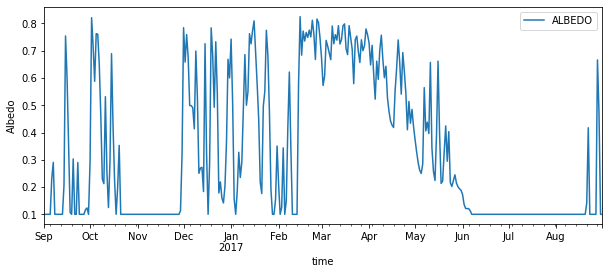

In [6]:
ALBEDO = ds['ALBEDO'].where(ds['MASK']==1).resample(time='1D').mean('time')
df = ALBEDO.mean('lon').mean('lat').to_dataframe()
fig = df.plot(figsize = (10,4)).set_ylabel('Albedo').get_figure()
fig.savefig('out/albedo.png',dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)


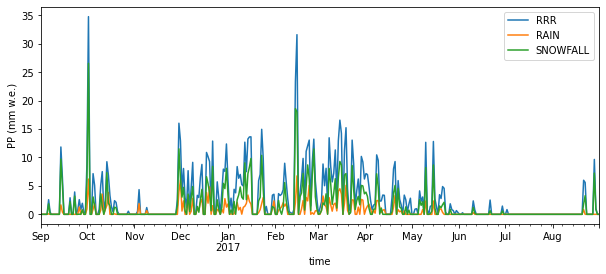

In [9]:
TOTAL_P = ds['RRR'].where(ds['MASK']==1).resample(time='1D').sum('time')
df = TOTAL_P.mean('lon').mean('lat').to_dataframe()
RAIN = ds['RAIN'].where(ds['MASK']==1).resample(time='1D').sum('time')
SNOWFALL = ds['SNOWFALL'].where(ds['MASK']==1).resample(time='1D').sum('time')

TOTAL_PT = []
RAIN_T = []
SNOWFALL_T = []
for t in range(len(df)):
    TOTAL_PT.append(np.diagonal(TOTAL_P[t].values).mean())
    RAIN_T.append(np.diagonal(RAIN[t].values).mean())
    SNOWFALL_T.append(np.diagonal(SNOWFALL[t].values).mean()*1000)

df['RRR'] = TOTAL_PT
df['RAIN'] = RAIN_T
df['SNOWFALL'] = SNOWFALL_T

fig = df.plot(figsize = (10,4)).set_ylabel('PP (mm w.e.)').get_figure()
fig.savefig('out/pp_total.png',dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

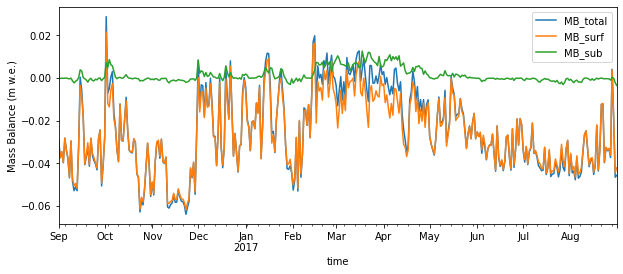

In [10]:
MB = ds['MB'].where(ds['MASK']==1).resample(time='1D').sum('time')
df = MB.mean('lon').mean('lat').to_dataframe()
surfMB = ds['surfMB'].where(ds['MASK']==1).resample(time='1D').sum('time')
intMB = ds['intMB'].where(ds['MASK']==1).resample(time='1D').sum('time')

MB_T = []
surfMB_T = []
intMB_T = []
for t in range(len(df)):
    MB_T.append(np.diagonal(MB[t].values).mean())
    surfMB_T.append(np.diagonal(surfMB[t].values).mean())
    intMB_T.append(np.diagonal(intMB[t].values).mean())

df['MB'] = MB_T
df['MB_surf'] = surfMB_T
df['MB_sub'] = intMB_T
df = df.rename(columns={'MB': 'MB_total'})

fig = df.plot(figsize = (10,4)).set_ylabel('Mass Balance (m w.e.)').get_figure()
fig.savefig('out/MB_total.png',dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)

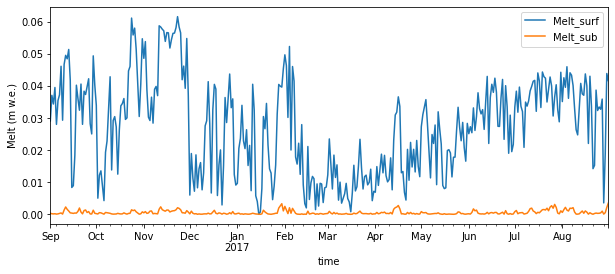

In [11]:
Melt_surf = ds['surfM'].where(ds['MASK']==1).resample(time='1D').sum('time')
df = Melt_surf.mean('lon').mean('lat').to_dataframe()
subM = ds['subM'].where(ds['MASK']==1).resample(time='1D').sum('time')

surfMB_T = []
intMB_T = []
for t in range(len(df)):
    surfMB_T.append(np.diagonal(Melt_surf[t].values).mean())
    intMB_T.append(np.diagonal(subM[t].values).mean())

df['surfM'] = surfMB_T
df['Melt_sub'] = intMB_T
df = df.rename(columns={'surfM': 'Melt_surf'})

fig = df.plot(figsize = (10,4)).set_ylabel('Melt (m w.e.)').get_figure()
fig.savefig('out/Melt_total.png',dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)


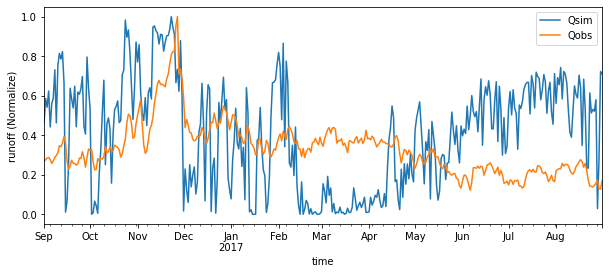

In [21]:
filename_csv = '../../data/input/Peru/data_runoff.csv'
df1 = pd.read_csv(filename_csv, delimiter='\t',index_col='date')

Runoff = ds['Q'].where(ds['MASK']==1).resample(time='1D').sum('time')
df = Runoff.mean('lon').mean('lat').to_dataframe()
Runoff_T = []

for t in range(len(df)):
    Runoff_T.append(np.diagonal(Runoff[t].values).sum())

df['Q'] = Runoff_T
df['Qobs'] = df1.loc['2016-09-01':'2017-08-31'].values
df = (df.rename(columns={'Q': 'Qsim'}))

df['Qsim'] = df['Qsim']/df['Qsim'].max()
df['Qobs'] = df['Qobs']/df['Qobs'].max()

fig = df.plot(figsize = (10,4)).set_ylabel('runoff (Normalize)').get_figure()